# 0.0 Imports

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import inflection

In [44]:
# ajuste de layout de gráficos
plt.style.use('bmh')
plt.rcParams.update({
    'figure.autolayout': True,
    'axes.titlepad': 10,
    'axes.labelpad': 8
})
sns.set()

# 1.0 Descrição dos dados

In [45]:
# leitura dos dados
df_raw = pd.read_csv('data/train.csv')
df1 = df_raw.copy()
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [46]:
# renomear colunas
cols_old = list(df1.columns)
cols_new =  list(map(lambda x: inflection.underscore(x), cols_old))
df1.columns = cols_new
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

In [47]:
# Dimensões
df1.shape

(381109, 12)

In [48]:
# dados faltantes
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

In [49]:
# tipos
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.1 Separação de numéricos e categóricos

In [50]:
#dados numéricos
df_num = df1.select_dtypes(exclude='object')
df_num.head(1)

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
0,1,44,1,28.0,0,40454.0,26.0,217,1


In [51]:
# dados categóricos
df_cat = df1.select_dtypes(include='object')
df_cat.head(1)

,gender,vehicle_age,vehicle_damage
0,Male,> 2 Years,Yes


## 1.2 Estatística descritiva

### 1.2.1 Dados numéricos

In [52]:
stats = df_num.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
driving_license,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
region_code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
previously_insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
annual_premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
policy_sales_channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [53]:
stats['skew'] = df_num.apply(lambda x: x.skew())
stats['kurtosis'] = df_num.apply(lambda x: x.kurtosis())

stats

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0,9.443274e-16,-1.200000
age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0,6.725390e-01,-0.565655
driving_license,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0,-2.159518e+01,464.354302
region_code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0,-1.152664e-01,-0.867857
previously_insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0,1.677471e-01,-1.971871
annual_premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0,1.766087e+00,34.004569
policy_sales_channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0,-9.000081e-01,-0.970810
vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0,3.029517e-03,-1.200688
response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0,2.301906e+00,3.298788


### 1.2.2 Dados categóricos

In [54]:
df_cat.apply(lambda x: x.unique())

gender                             [Male, Female]
vehicle_age       [> 2 Years, 1-2 Year, < 1 Year]
vehicle_damage                          [Yes, No]
dtype: object

# 2.0 Feature Engineering

# 3.0 Filtragem de variáveis

# 4.0 Análise Exploratória de Dados(EDA)

### 4.0.1 Levantamento de Hipóteses

Entidades e atributos
* Clientes
    - gênero
    - idade
    - salário
    - estado civil
    - filhos
    - profissão
    - tempo segurado
    - valor do seguro
    - estilo de condução
* Vendedores
    - tempo de experiência
    - qtd vendas
* Veículos
    - valor
    - idade
    - modelo
    - tipo
    - dano
* Local
    - IDH
    - índice de violência
    - valor m2
* Tempo
    - estação do ano

### Hipóteses

* H1 - Pessoas mais velhas são mais propensas a comprar
* H2 - Pessoas do gênero feminino são mais propensas
* H3 - Pessoas há mais tempo seguradas são mais propensas
* H4 - Pessoas com maior valor de seguro são mais propensas
* H5 - Clientes com veículos mais novos vão ter maior propensão
* H6 - Clientes que tiveram dano no veículo têm maior propensão

## 4.1 Análise univariada

In [55]:
df4 = df1.copy()

### 4.1.1 Variável Resposta

In [56]:
df_aux = df4[['id', 'response']].groupby('response').count().reset_index()
df_aux

,response,id
0,0,334399
1,1,46710


In [58]:
# proporção compradores/total

ratio = round(int(df_aux['id'][df_aux['response'] == 1].iloc[0]) / int(df_aux['id'].sum()), 2)
ratio

0.12

<Axes: xlabel='response', ylabel='id'>

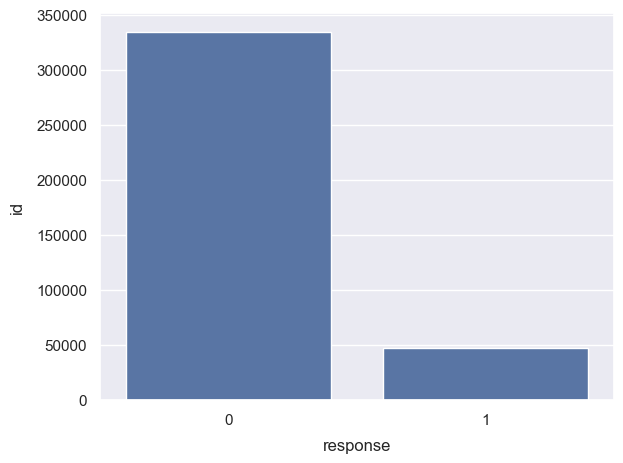

In [59]:
sns.barplot(df_aux, x = 'response', y= 'id')

### 4.1.2 Variáveis Numéricas

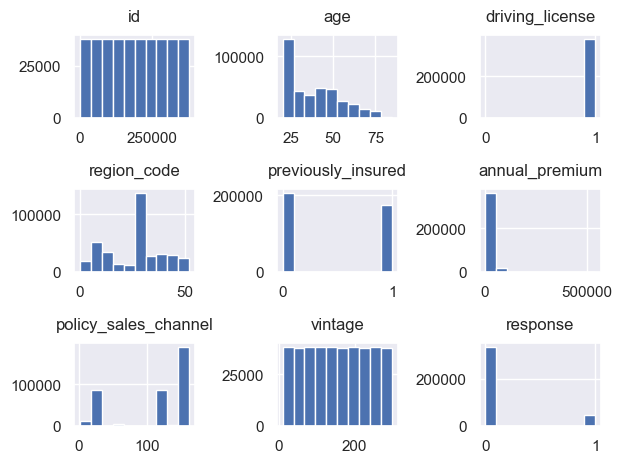

In [60]:
df_num.hist();

### 4.1.3 Variáveis Categóricas

In [61]:
df_cat.columns

Index(['gender', 'vehicle_age', 'vehicle_damage'], dtype='object')

In [62]:
# valores de gênero
df_cat['gender'].drop_duplicates()

0      Male
4    Female
Name: gender, dtype: object

In [63]:
# valores de idade do veículo
df_cat['vehicle_age'].drop_duplicates()

0    > 2 Years
1     1-2 Year
3     < 1 Year
Name: vehicle_age, dtype: object

In [64]:
# valores de dano
df_cat['vehicle_damage'].drop_duplicates()

0    Yes
1     No
Name: vehicle_damage, dtype: object

<Axes: xlabel='gender', ylabel='count'>

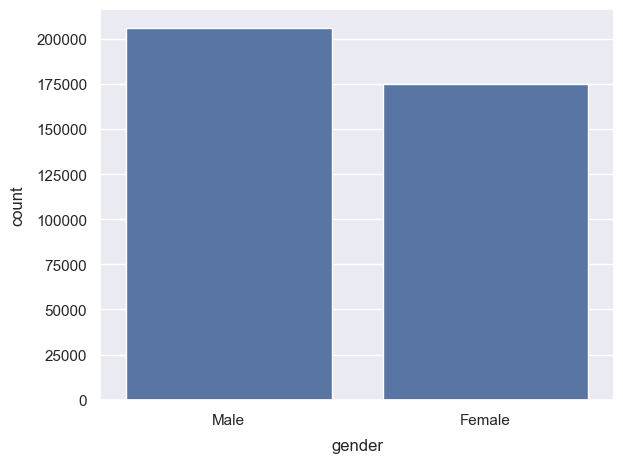

In [67]:
sns.countplot(x=df_cat['gender'])

<Axes: xlabel='vehicle_age', ylabel='count'>

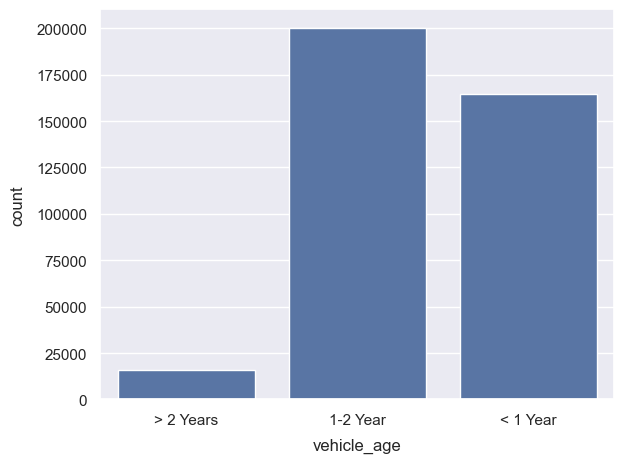

In [68]:
sns.countplot(x=df_cat['vehicle_age'])

<Axes: xlabel='vehicle_damage', ylabel='count'>

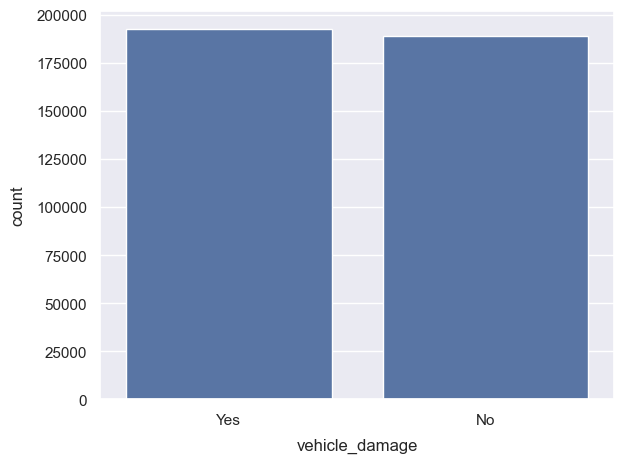

In [69]:
sns.countplot(x=df_cat['vehicle_damage'])

## 4.2 Análise Bivariada

### 4.2.1 Validação de hipóteses

### H1 - Pessoas mais velhas são mais propensas a comprar

Verdadeira. Entre os que compraram, há maior concentração em torno da faixa de 45 anos.

Processo: comparar distribuição de idade entre grupos compradores e não-compradores

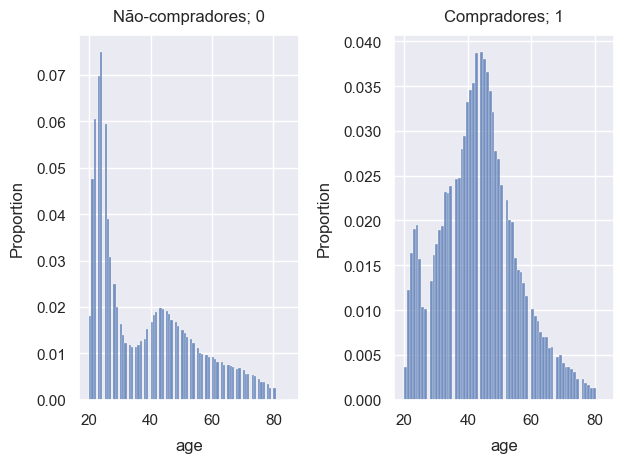

In [84]:
plt.subplot(1,2,1)
aux0 = df4.loc[df4['response'] == 0, 'age']
sns.histplot(aux0, stat='proportion');
plt.title('Não-compradores; 0')
plt.subplot(1,2,2)
aux1 = df4.loc[df4['response'] == 1, 'age']
sns.histplot(aux1, stat='proportion');
plt.title('Compradores; 1');


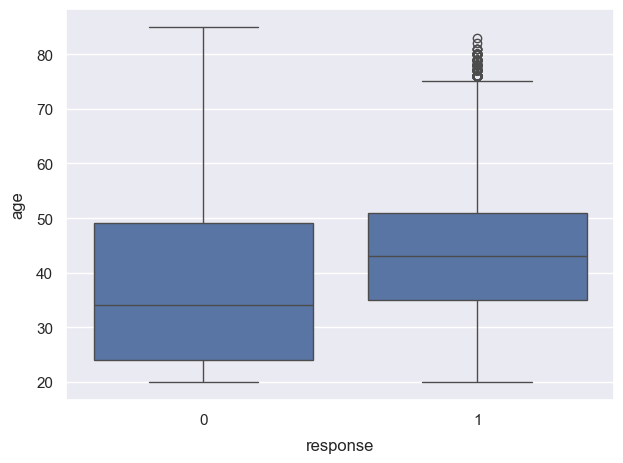

In [81]:
sns.boxplot(df4, x= df4['response'], y= df4['age']);

### H2 - Pessoas do gênero feminino são mais propensas

Falsa. Embora haja uma influência do gênero, homens são mais propensos a comprar.

Processo: comparar proporção entre grupos em função de gênero

Text(0.5, 1.0, 'Compradores; 1')

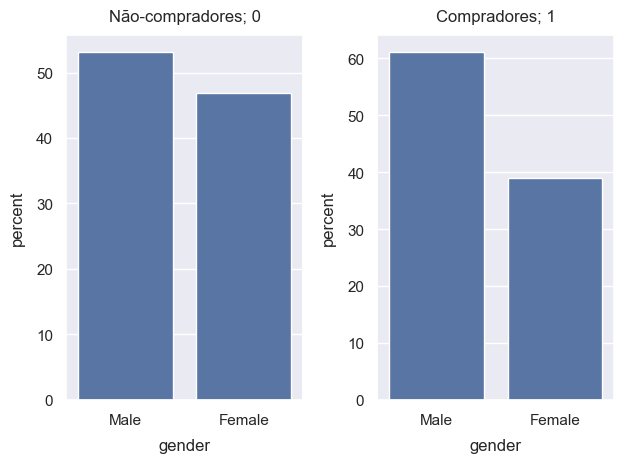

In [91]:
plt.subplot(1,2,1)
aux0 = df4[['response', 'gender']][df4['response']==0]
sns.countplot(x=aux0['gender'], stat='percent');
plt.title('Não-compradores; 0')
plt.subplot(1,2,2)
aux1 = df4[['response', 'gender']][df4['response']==1]
sns.countplot(x=aux1['gender'], stat='percent');
plt.title('Compradores; 1')

### H3 - Pessoas há mais tempo seguradas são mais propensas

Falsa. O tempo de seguro não afeta a propensão

Processo: comparar distribuições

<Axes: xlabel='response', ylabel='vintage'>

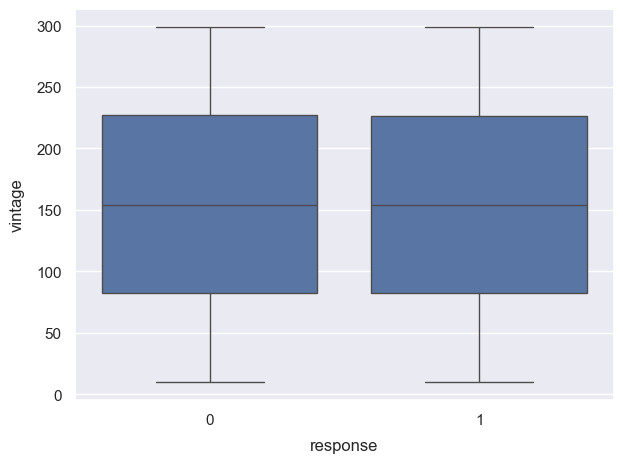

In [92]:
sns.boxplot(df4, x=df4['response'], y=df4['vintage'])

### H4 - Pessoas com maior valor de seguro são mais propensas

Falsa. Embora a mediana do grupo comprador seja um pouco maior que do grupo não-comprador, não parece ser uma diferença significativa

<Axes: xlabel='response', ylabel='annual_premium'>

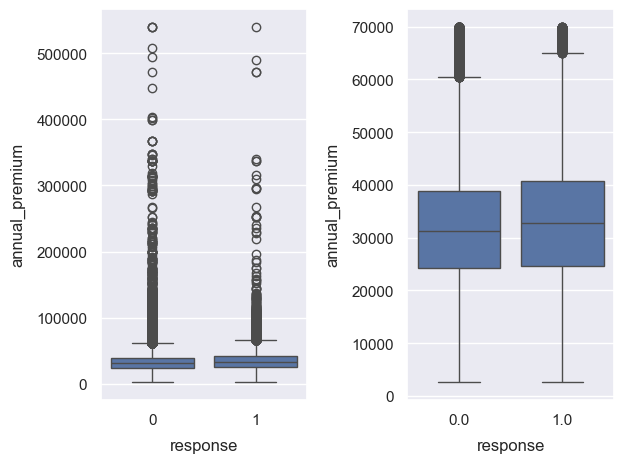

In [95]:
plt.subplot(1,2,1)
sns.boxplot(df4, x=df4['response'], y=df4['annual_premium'])
plt.subplot(1,2,2)
sns.boxplot(df4, x=df4['response'][df4['annual_premium']<70000], y=df4['annual_premium'])

In [101]:
aux = df4.loc[:, ['response', 'annual_premium']].groupby('response').agg(['mean', 'std'])
aux

annual_premium              
                   mean           std
response                             
0          30419.160276  16998.293197
1          31604.092742  18646.508040

### H5 - Clientes com veículos mais novos vão ter maior propensão

Falsa. Embora haja uma concentração de clientes com carros na faixa 1-2 anos que compraram o segundo seguro, 
entre os clientes não-propensos há uma contribuição mais expressiva de clientes com os carros mais novos.

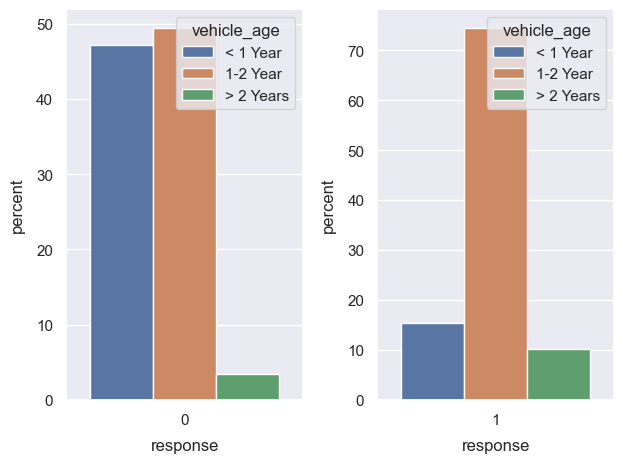

In [128]:
plt.subplot(1,2,1)
aux = df4.loc[df4['response']==0, ['response', 'vehicle_age']]
sns.countplot(aux, x=aux['response'], hue=aux['vehicle_age'], stat='percent',hue_order=['< 1 Year', '1-2 Year', '> 2 Years'])
plt.subplot(1,2,2)
aux = df4.loc[df4['response']==1, ['response', 'vehicle_age']]
sns.countplot(aux, x=aux['response'], hue=aux['vehicle_age'], stat='percent', hue_order=['< 1 Year', '1-2 Year', '> 2 Years']);

### H6 - Clientes que tiveram dano no veículo têm maior propensão

Verdadeira. Dos clientes propensos, quase todos tiveram dano no veículo.

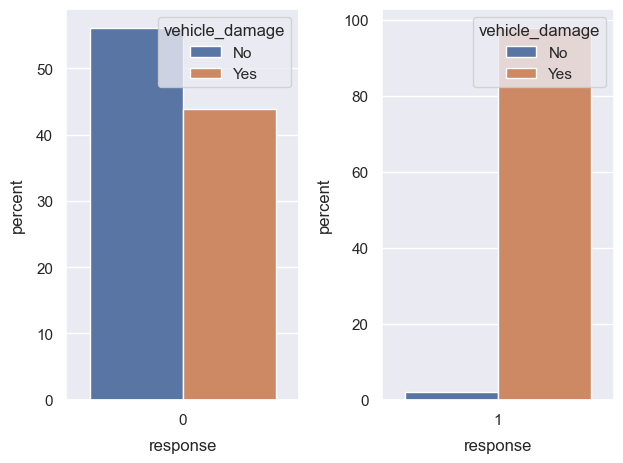

In [127]:
plt.subplot(1,2,1)
aux = df4.loc[df4['response']==0, ['response', 'vehicle_damage']]
sns.countplot(aux, x=aux['response'], hue=aux['vehicle_damage'],stat='percent', hue_order=['No', 'Yes'])
plt.subplot(1,2,2)
aux = df4.loc[df4['response']==1, ['response', 'vehicle_damage']]
sns.countplot(aux, x=aux['response'], hue=aux['vehicle_damage'],stat='percent', hue_order=['No', 'Yes']);